In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from orphics import maps,io,cosmology,stats,btip
from enlib import enmap
import numpy as np

In [2]:
deg = 3.
px = 0.5
shape,wcs,modlmap,cc,mgen = maps.flat_sim(deg,px,lmax=6000,lensed=True,pol=True)
modrmap = enmap.modrmap(shape,wcs)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_6000_20180310.pkl
Loaded cached Cls from  output/clphi_low_acc_False_6000_20180310.txt


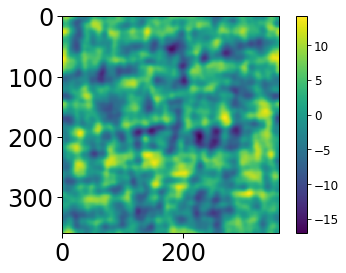

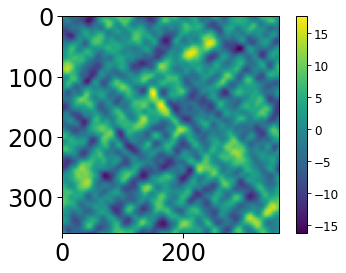

In [3]:
imap = mgen.get_map()
io.plot_img(imap[1])
io.plot_img(imap[2])

In [4]:
enmap.queb_rotmat(enmap.lmap(shape,wcs)).shape

(2, 2, 360, 360)

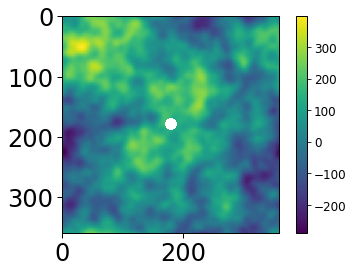

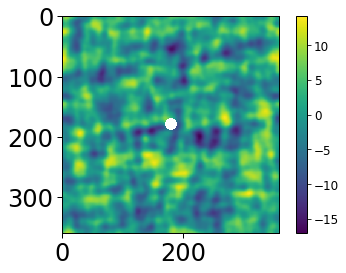

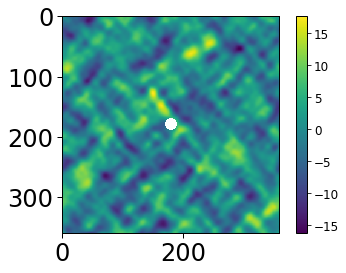

In [5]:
masked = imap.copy()
hole_arcmin = 5.
context_arcmin = 15.
mask_radius = hole_arcmin*np.pi/180./60.
masked[:,modrmap<mask_radius] = np.nan
io.plot_img(masked[0])
io.plot_img(masked[1])
io.plot_img(masked[2])

In [7]:
power2d = cc.theory.lCl('TT',modlmap)
meanMul, covRoot, pcov, tshape,twcs, m1, m2 = btip.make_circular_geometry(shape,wcs,context_arcmin,
                                                                          hole_arcmin,power2d,
                                                                          buffer_factor = 2,verbose=True)

Downsampling...
Starting slow part...
 0.46  2.59  2.84 pixcov
 0.13  2.60  2.84 geom


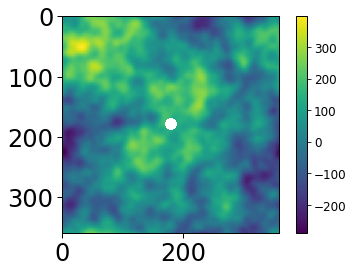

In [8]:
tmasked = masked[0]
io.plot_img(tmasked)

(360, 360) (30, 30)


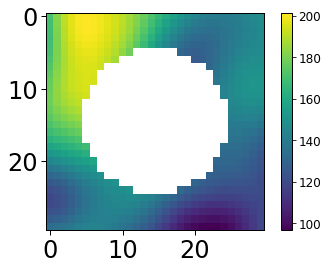

In [9]:
print(tmasked.shape,tshape)
tstamp = enmap.enmap(maps.crop_center(tmasked,tshape[0],tshape[1]),twcs)
io.plot_img(tstamp)

In [15]:
orig = tstamp.copy()
masked, maskedMean = btip.prepare_circular_mask(tstamp,hole_arcmin)
masked = np.nan_to_num(masked)
mean, rand, sim = btip.fill_hole(masked,meanMul,hole_arcmin,m1,m2,covRoot)
a = masked.reshape(-1)
a[m1] = sim+maskedMean
a[m2] = masked.reshape(-1)[m2]
inpainted = a.reshape(orig.shape[-2:])

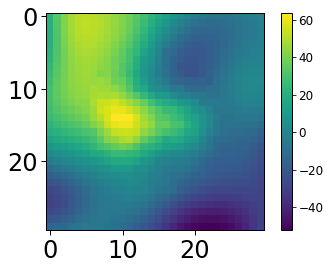

In [16]:
io.plot_img(inpainted)